<a href="https://colab.research.google.com/github/AmiAnurag/Feature-Engineering/blob/main/Handling_categorical_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import math

In [2]:
df=pd.read_csv("/content/drive/MyDrive/DataSets/advance house prediction data.csv",usecols=['GarageType','BsmtQual','GarageQual','SalePrice'])
df.head()

,BsmtQual,GarageType,GarageQual,SalePrice
0,Gd,Attchd,TA,208500
1,Gd,Attchd,TA,181500
2,Gd,Attchd,TA,223500
3,TA,Detchd,TA,140000
4,Gd,Attchd,TA,250000


SalePrice     0.000000
BsmtQual      0.025342
GarageType    0.055479
GarageQual    0.055479
dtype: float64

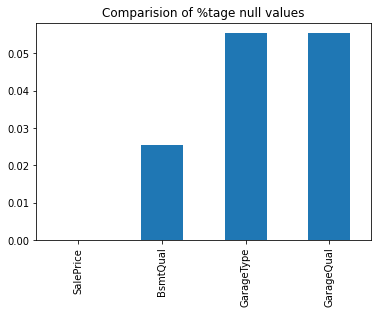

In [3]:
plt.title("Comparision of %tage null values")
df.isnull().mean().sort_values(ascending=True).plot.bar()
df.isnull().mean().sort_values(ascending=True)

# Storing Information about the Nan Value Location

~ the process below is surely going to be curse of dimensionality later on i will handle it too

In [4]:
def nan_inf(data,feature):
  df[feature+'_Nan Information']=np.where(df[feature].isnull(),1,0)

In [5]:
features_set=['GarageType','BsmtQual','GarageQual']
for feature in features_set:
  nan_inf(df,feature)
df.head()

,BsmtQual,GarageType,GarageQual,SalePrice,GarageType_Nan Information,BsmtQual_Nan Information,GarageQual_Nan Information
0,Gd,Attchd,TA,208500,0,0,0
1,Gd,Attchd,TA,181500,0,0,0
2,Gd,Attchd,TA,223500,0,0,0
3,TA,Detchd,TA,140000,0,0,0
4,Gd,Attchd,TA,250000,0,0,0


In [6]:
df['BsmtQual_Nan Information'].value_counts()

0    1423
1      37
Name: BsmtQual_Nan Information, dtype: int64

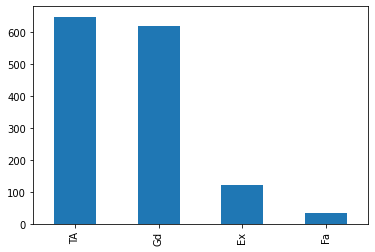

In [7]:
df['BsmtQual'].value_counts().plot.bar()

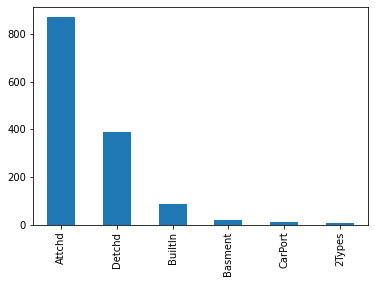

In [8]:
df['GarageType'].value_counts().plot.bar()

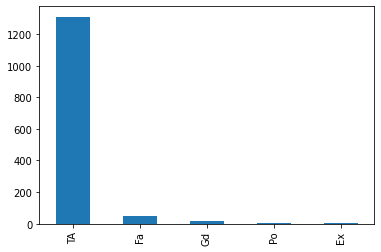

In [9]:
df['GarageQual'].value_counts().plot.bar()

**For the first categorical missing value handling we will be replacing the nan value with the most frequenctly occuring category.**

# **Frequent value imputation**

for this we will use the BsmtQual column

In [10]:
df.BsmtQual.fillna(df.BsmtQual.value_counts().sort_values(ascending=False).index[0],inplace=True)
#df.GarageQual.fillna(df.GarageQual.value_counts().sort_values(ascending=False).index[0],inplace=True)
#df.GarageType.fillna(df.GarageType.value_counts().sort_values(ascending=False).index[0],inplace=True)
#also we can use the mode command

In [11]:
df.GarageType.mode()[0]

'Attchd'

In [12]:
df.isnull().mean()

BsmtQual                      0.000000
GarageType                    0.055479
GarageQual                    0.055479
SalePrice                     0.000000
GarageType_Nan Information    0.000000
BsmtQual_Nan Information      0.000000
GarageQual_Nan Information    0.000000
dtype: float64

***As we have seen the missing value were not more than 20% for any case. So replacing with frequenct charecter is completely ok.***

# Replacing nan with new feature

In [13]:
df.GarageQual.fillna("Missing",inplace=True)
df.GarageQual.value_counts()

TA         1311
Missing      81
Fa           48
Gd           14
Po            3
Ex            3
Name: GarageQual, dtype: int64

### **My own designed efficient way of storing the nan values**

Use a column to store nan information of entire dataset by replacing the location of nan in the new column by sum of the null value of the column and for n columns having nan at same row use null count of all column and add them to fill the nan information column.

In [14]:
df=pd.read_csv("/content/drive/MyDrive/DataSets/advance house prediction data.csv",usecols=['GarageType','BsmtQual','GarageQual','SalePrice'])
df.head()

,BsmtQual,GarageType,GarageQual,SalePrice
0,Gd,Attchd,TA,208500
1,Gd,Attchd,TA,181500
2,Gd,Attchd,TA,223500
3,TA,Detchd,TA,140000
4,Gd,Attchd,TA,250000


In [30]:
df['BsmtQual'][17]!=df['BsmtQual'][17]

True

In [31]:
def isNaN(val):
  return val!=val

In [34]:
def nan_func(data,features):
  data['Nan_Information']=np.zeros(len(data))
  for feat in features:
    for i in range(len(data)):
      if isNaN(data[feat][i]):
        # print(True)
        data['Nan_Information'][i]+=data[feat].isnull().mean()

In [40]:
nan_func(df,['GarageType','BsmtQual','GarageQual'])
df[75:85]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,BsmtQual,GarageType,GarageQual,SalePrice,Nan_Information
75,Gd,BuiltIn,TA,91000,0.000000
76,TA,Detchd,TA,135750,0.000000
77,TA,Detchd,TA,127000,0.000000
78,TA,NaN,NaN,136500,0.110959
79,TA,Detchd,TA,110000,0.000000
80,Gd,Attchd,TA,193500,0.000000
81,Ex,Attchd,TA,153500,0.000000
82,Gd,Attchd,TA,245000,0.000000
83,TA,Detchd,TA,126500,0.000000
84,Gd,BuiltIn,TA,168500,0.000000


In [41]:
df.Nan_Information.value_counts()

0.000000    1349
0.110959      74
0.025342      30
0.136301       7
Name: Nan_Information, dtype: int64

In [42]:
df.isnull().mean()

BsmtQual           0.025342
GarageType         0.055479
GarageQual         0.055479
SalePrice          0.000000
Nan_Information    0.000000
dtype: float64

An observation can be made from this process. Wherever the GarageQual is absent GarageType is also absent. 

This process can also provide us a hint about mcar mar mnar